In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
file_path = "./data/wordcount0.txt"

# each entry contains a text row
df = pd.read_csv(file_path, header=None)
df.head()

,0
0,word count from Wikipedia the free encyclopedia
1,the word count is the number of words in a doc...
2,is required to stay within certain numbers of ...
3,proceedings journalism and advertising Word co...
4,the translation job Word counts may also be us...


In [3]:
%%time 
wc_df = (
    df[0]
    .str
    .split(expand=True) # splits row around ' ' separator and expand into columns
    .stack() # stack columns vertically -> each entry contains a single word
    .value_counts()
    .reset_index()
)

CPU times: user 3.62 ms, sys: 0 ns, total: 3.62 ms
Wall time: 3.36 ms


In [4]:
wc_df.head()

,index,count
0,the,38
1,a,28
2,of,25
3,word,24
4,and,23


## Do the same with `dask.dataframe`

In [5]:
from dask.distributed import Client
client = Client() # run on localhost

In [6]:
import dask.dataframe as dd

df_dd = dd.read_csv(file_path, header=None)
df_dd.head()

,0
0,word count from Wikipedia the free encyclopedia
1,the word count is the number of words in a doc...
2,is required to stay within certain numbers of ...
3,proceedings journalism and advertising Word co...
4,the translation job Word counts may also be us...


In [7]:
%%time 
wc_df_dd = (
    df_dd[0]
    .str
    .split()
    .explode()
    .value_counts()
    .reset_index()
)

CPU times: user 2.69 ms, sys: 0 ns, total: 2.69 ms
Wall time: 2.39 ms


In [8]:
wc_df_dd.compute().sort_values(['count'], ascending=[False]).head()

/home/UR/coelhrod/.local/lib/python3.10/site-packages/dask/dataframe/methods.py:364: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return x.groupby(level=0, **groupby_kwargs).sum()
/home/UR/coelhrod/.local/lib/python3.10/site-packages/dask/dataframe/methods.py:364: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return x.groupby(level=0, **groupby_kwargs).sum()
/home/UR/coelhrod/.local/lib/python3.10/site-packages/dask/utils.py:772: UserWarning: The DataFrame has non-str index name `[np.int64(0)]` which will be converted to string and not roundtrip correctly.
  return meth(arg, *args, **kwargs)


2025-02-26 11:27:39,883 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 6d2a2285a25eee78fa78da17e798500f initialized by task ('shuffle-transfer-6d2a2285a25eee78fa78da17e798500f', 0) executed on worker tcp://127.0.0.1:35445
2025-02-26 11:27:39,910 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 6d2a2285a25eee78fa78da17e798500f deactivated due to stimulus 'task-finished-1740565659.909282'
2025-02-26 11:27:40,198 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 6d2a2285a25eee78fa78da17e798500f initialized by task ('shuffle-transfer-6d2a2285a25eee78fa78da17e798500f', 0) executed on worker tcp://127.0.0.1:35445
2025-02-26 11:27:40,974 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 6d2a2285a25eee78fa78da17e798500f deactivated due to stimulus 'task-finished-1740565660.9738228'
2025-02-26 11:27:46,165 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 646529d16690c2a32a0bee66b2c8a9ed initialized by task ('shuffle-transfer-646529d16690c2a

,0,count
324,the,38
50,a,28
245,of,25
376,word,24
66,and,23


In [9]:
wc_df_dd

,0,count
npartitions=1,,
,object,int64
,...,...


Only one partition, because it is a small dataset

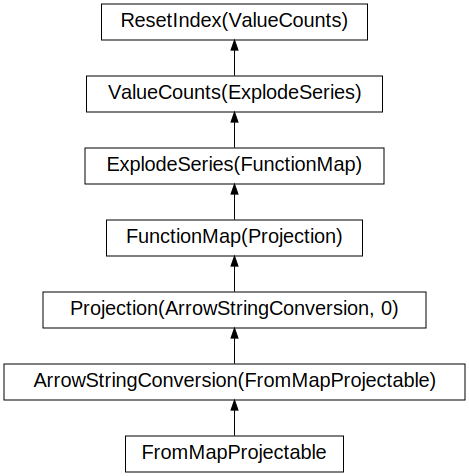

In [10]:
wc_df_dd.visualize()

## Évaluer le temps de restitution pour les fichiers wordcount0.txt and wordcount1.txt

In [11]:
filepaths = ["./data/wordcount0.txt", "./data/wordcount1.txt", "./data/wordcount2.txt"]
pd_times = []
dd_times = []

for f in filepaths:
    print("\n====",f,"====")
    
    if f != "./data/wordcount2.txt":
        tic = time.time()
        df = pd.read_csv(f, header=None)
        wc_df = (
            df[0]
            .str
            .split(expand=True) # splits row around ' ' separator and expand into columns
            .stack() # stack columns vertically -> each entry contains a single word
            .value_counts()
            .reset_index()
        )
        print("Pandas:\n",wc_df.head())
        toc = time.time()
        pd_times.append(toc-tic)

    # print("\n")
    tic = time.time()
    df_dd = dd.read_csv(f, header=None)
    wc_df_dd = (
        df_dd[0]
        .str
        .split()
        .explode()
        .value_counts()
        .reset_index()
    )
    print("Dask:\n",wc_df_dd.compute().sort_values(['count'], ascending=[False]).head())
    toc = time.time()
    dd_times.append(toc-tic)
    

/home/UR/coelhrod/.local/lib/python3.10/site-packages/dask/dataframe/methods.py:364: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return x.groupby(level=0, **groupby_kwargs).sum()
/home/UR/coelhrod/.local/lib/python3.10/site-packages/dask/dataframe/methods.py:364: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return x.groupby(level=0, **groupby_kwargs).sum()



==== ./data/wordcount0.txt ====
Pandas:
   index  count
0   the     38
1     a     28
2    of     25
3  word     24
4   and     23


/home/UR/coelhrod/.local/lib/python3.10/site-packages/dask/utils.py:772: UserWarning: The DataFrame has non-str index name `[np.int64(0)]` which will be converted to string and not roundtrip correctly.
  return meth(arg, *args, **kwargs)


Dask:
         0  count
324   the     38
50      a     28
245    of     25
376  word     24
66    and     23

==== ./data/wordcount1.txt ====
Pandas:
   index   count
0   the  372438
1     a  274428
2    of  245025
3  word  235224
4   and  225423


/home/UR/coelhrod/.local/lib/python3.10/site-packages/dask/dataframe/methods.py:364: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return x.groupby(level=0, **groupby_kwargs).sum()
/home/UR/coelhrod/.local/lib/python3.10/site-packages/dask/dataframe/methods.py:364: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return x.groupby(level=0, **groupby_kwargs).sum()
/home/UR/coelhrod/.local/lib/python3.10/site-packages/dask/utils.py:772: UserWarning: The DataFrame has non-str index name `[np.int64(0)]` which will be converted to string and not roundtrip correctly.
  return meth(arg, *args, **kwargs)
/home/UR/coelhrod/.local

Dask:
         0   count
324   the  372438
50      a  274428
245    of  245025
376  word  235224
66    and  225423

==== ./data/wordcount2.txt ====


/home/UR/coelhrod/.local/lib/python3.10/site-packages/dask/utils.py:772: UserWarning: The DataFrame has non-str index name `[np.int64(0)]` which will be converted to string and not roundtrip correctly.
  return meth(arg, *args, **kwargs)
/home/UR/coelhrod/.local/lib/python3.10/site-packages/dask/utils.py:772: UserWarning: The DataFrame has non-str index name `[np.int64(0)]` which will be converted to string and not roundtrip correctly.
  return meth(arg, *args, **kwargs)
/home/UR/coelhrod/.local/lib/python3.10/site-packages/dask/utils.py:772: UserWarning: The DataFrame has non-str index name `[np.int64(0)]` which will be converted to string and not roundtrip correctly.
  return meth(arg, *args, **kwargs)
/home/UR/coelhrod/.local/lib/python3.10/site-packages/dask/utils.py:772: UserWarning: The DataFrame has non-str index name `[np.int64(0)]` which will be converted to string and not roundtrip correctly.
  return meth(arg, *args, **kwargs)
/home/UR/coelhrod/.local/lib/python3.10/site-pac

Dask:
        0    count
59   the  3351942
6      a  2469852
43    of  2205225
70  word  2117016
8    and  2028807


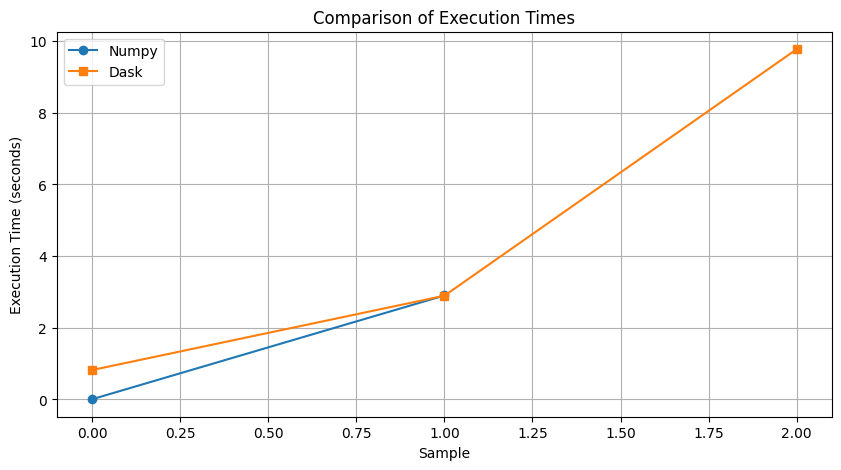

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(filepaths)-1), pd_times, label='Numpy', marker='o')
plt.plot(range(len(filepaths)), dd_times, label='Dask', marker='s')
plt.xlabel('Sample')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Times')
plt.legend()
plt.grid()
plt.show()

In [14]:
wc_df_dd

,0,count
npartitions=6,,
,object,int64
,...,...
...,...,...
,...,...
,...,...


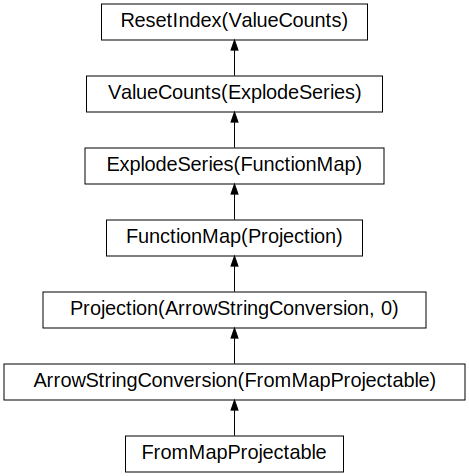

In [15]:
wc_df_dd.visualize()

Only map (applies the same treatment to all independent data)